# New classification

This is my final classifications, with th optimised RF I determined before

Now, I will only use td = 12 and 100 trees 

In [3]:
import numpy as np
import sklearn 
from sklearn.neighbors import KDTree
import time
from sklearn import metrics
import pylab as plt
import pandas as pd
from sklearn.externals import joblib
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

Try first with the initial dataset, i.e. only the geometric features and following Weinmann 2014 

No reflectance and no multi-scale features 

In [4]:
# Define a data frame with all my data# Define  
FILE_PATH = r"../DATA"
FILE_PATH_ScenarioB = r"../DATA/ML_datasets/ScenarioB"
FILE_PATH_ScenarioC = r"../DATA/ML_datasets/ScenarioC"

# Training data
# use the sub-sampled dataset with only 3000 instances
y_train = np.loadtxt(FILE_PATH_ScenarioB+'/y_train.txt', delimiter=',')
X_train = np.loadtxt(FILE_PATH_ScenarioB+'/X_train.txt', delimiter=',')

# Testing data
y_test = np.loadtxt(FILE_PATH_ScenarioB+'/y_test.txt', delimiter=',')
X_test = np.loadtxt(FILE_PATH_ScenarioB+'/X_test.txt', delimiter=',')

In [5]:
# For RF classifier 
y_train = y_train.astype('float32')
X_train = X_train.astype('float32')
y_test = y_test.astype('float32')
X_test = X_test.astype('float32')

### Downsampling
Here, the smallest class is determined and all other classes are downsampled accordingly

In [9]:
# Create an empty matrix and fill it with the features and then label at the end 
M = np.zeros((X_train.shape[0], X_train.shape[1]+1))
M[:,-1]=y_train
M[:,:32] = X_train
LOT_classes = range(1,12)
smallest_class_value = 3000

In [11]:
y_train = None
X_train = None

In [12]:
data = []
for class_label in LOT_classes:
    N = M[np.where(M[:,-1]==class_label)]
    S = N[:smallest_class_value,:]
    data.append(S)

In [13]:
data_array = np.array(data)
print "Dimensions of array of all data", data_array.shape

Dimensions of array of all data (11, 3000, 33)


In [14]:
data = data_array.reshape((data_array.shape[0] *smallest_class_value, data_array.shape[2]))

In [15]:
print "Real shape for the training data", data.shape

Real shape for the training data (33000, 33)


In [16]:
print "First instance before shuffling:", data[0]

First instance before shuffling: [ 2.37521663e-01  7.61425734e-01  1.05262187e-03  7.16051436e-05
  9.98947382e-01  9.90549661e-03  1.35881605e-03  5.96883125e-04
  9.88581250e+04 -2.42687893e+00  6.59000012e-04 -5.26976204e+00
  9.94913757e-01  4.18876624e-03  8.97496298e-04  3.12984275e-06
  9.99102533e-01  1.63390953e-03  1.89802973e-04  8.92157841e-04
  1.91216891e+05  6.59000012e-04  1.30476192e-01  8.68927419e-01
  5.96398197e-04  1.22814046e-04  9.99403596e-01  1.87270232e-02
  2.85876379e-03  3.18909035e-04  5.69240703e+04  6.59000012e-04
  1.00000000e+00]


In [17]:
np.random.shuffle(data)

In [18]:
print "First instance after shuffling:", data[0]

First instance after shuffling: [ 6.19168460e-01  3.52394611e-01  2.84369085e-02  7.65234698e-04
  9.71563101e-01  2.92439461e-02  4.87434911e-03  2.01784894e-02
  7.85483838e+03 -8.77040982e-01  8.40667009e-01 -4.87957811e+00
  9.04675424e-01  9.52760875e-02  4.84886223e-05  1.20184613e-05
  9.99951482e-01  5.87923266e-03  7.90307357e-04  4.42667661e-05
  2.20098164e+04  8.40667009e-01  6.04926765e-01  3.33855003e-01
  6.12182580e-02  1.90677587e-03  9.38781738e-01  5.17647676e-02
  9.60200094e-03  4.20370921e-02  5.66589502e+03  8.40667009e-01
  7.00000000e+00]


In [20]:
# Save all my data as NUMPY arrays
# To load them later
# np.loadtxt()
np.savetxt(FILE_PATH_ScenarioB+'/y_train_3000samples.txt', data[:,-1], delimiter=',')
np.savetxt(FILE_PATH_ScenarioB+'/X_train_3000samples.txt', data[:,:32], delimiter=',')

In [22]:
X_train = data[:,:32]
y_train = data[:,-1]

## Classification goes here

In [118]:
start = time.time()
clf = RandomForestClassifier(max_depth=12, random_state=42, n_estimators=100, criterion='gini')
print 'Created Random Forest in:', float(time.time()-start), 'seconds'
start = time.time()
clf.fit(X_train, y_train)
print 'Fit model in:', float(time.time()-start), 'seconds'

Created Random Forest in: 0.000516891479492 seconds
Fit model in: 16.3227539062 seconds


In [26]:
# Make predictions for the unseen dataset 
predictions = clf.predict(X_test)

## Evaluate now

In [27]:
# This is my overall accuracy again 
score_train = clf.score(X_train, y_train)
score_test = clf.score(X_test, y_test)

print "Train score:", score_train*100
print "Test score", score_test*100

Train score: 92.96969696969697
Test score 87.2917344316271


In [28]:
# Now precision, recall and F1 score
f1 = f1_score(y_test, predictions, average="weighted")
rec = recall_score(y_test, predictions, average="weighted")
prec = precision_score(y_test, predictions, average="weighted")

print "F1", f1
print "recall", rec
print "precision", prec

F1 0.9059708449682049
recall 0.872917344316271
precision 0.9567681252638054


In [127]:
# Create the evaluation file
target_names = ['Road', 'Sidewalk', 'Curb', 'Building', 'Other pole-like', 
                'Small poles', 'Pedestrians', '2-wheelers', '4-wheelers','trees', 'Potted plants']

clf_report_B = classification_report(y_test, predictions, target_names=target_names)
clf_report_B = clf_report_B.encode('ascii','ignore')
print clf_report_B

# Save it in new text file
file = open(FILE_PATH_ScenarioB + "/clf_report_scenarioB.txt", "w")
file.write(clf_report_B)
file.close()

                 precision    recall  f1-score   support

           Road       1.00      0.91      0.95    646126
       Sidewalk       0.79      0.93      0.85    176841
           Curb       0.38      0.99      0.55     11971
       Building       1.00      0.85      0.92   1271960
Other pole-like       0.03      0.97      0.06       768
    Small poles       0.76      0.99      0.86      3605
    Pedestrians       0.05      0.88      0.10      4614
     2-wheelers       0.17      0.73      0.27      7960
     4-wheelers       0.72      0.75      0.73     63779
          trees       0.27      0.94      0.43     21041
  Potted plants       0.10      0.88      0.17      1794

    avg / total       0.96      0.87      0.91   2210459



Normalized confusion matrix


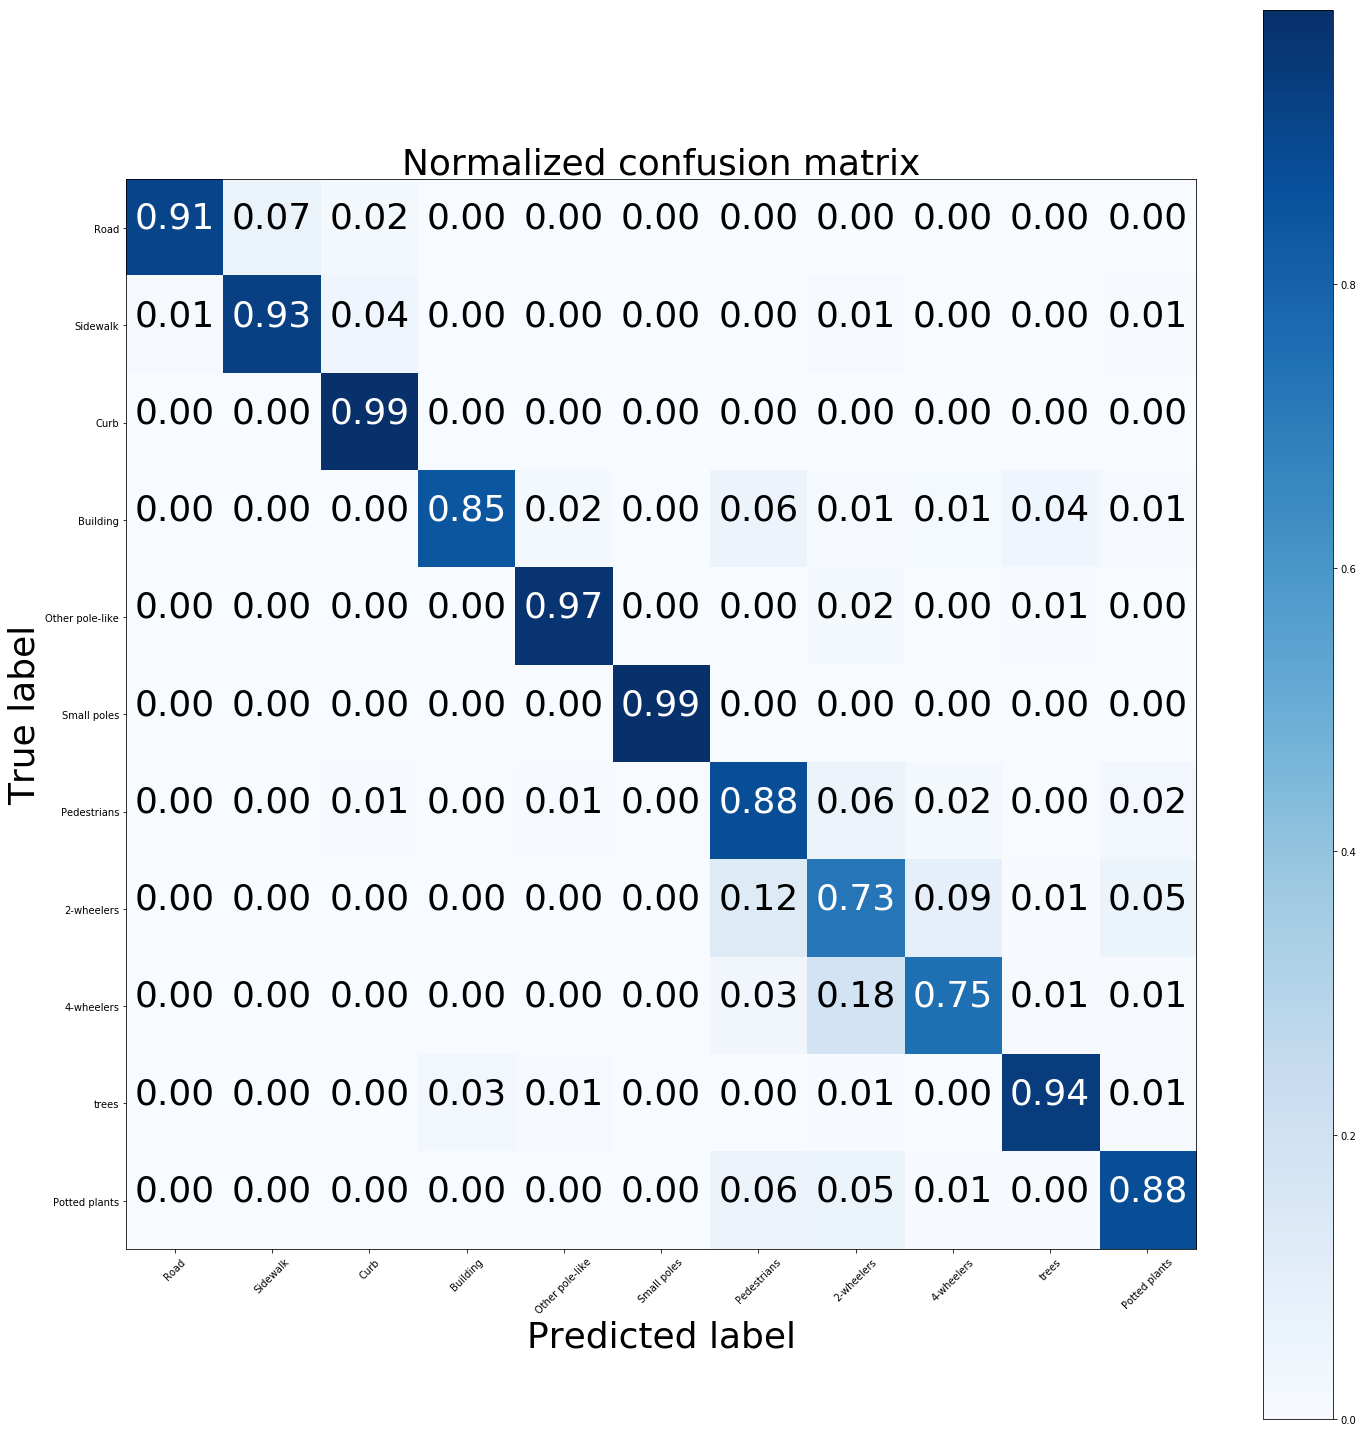

In [147]:
# Create the confusion matrix
class_names = target_names
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=36)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),fontsize=36,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=36)
    plt.xlabel('Predicted label',fontsize=36)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure(figsize=(20,20))
#plot_confusion_matrix(cnf_matrix, classes=class_names,
                      #title='Confusion matrix, without normalization')


# Plot normalized confusion matrix
plt.figure(figsize=(20,20))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig(FILE_PATH_ScenarioB+"/ConfusionMatrixScenarioB")

plt.show()

In [152]:
confusion_matrix(y_test, predictions)

array([[ 590990,   42214,   11560,       0,      12,     161,      83,
            704,     117,      14,     271],
       [   1777,  164177,    7479,       0,       5,     134,     265,
           1636,     206,     137,    1025],
       [     15,      36,   11891,       0,       0,       2,       0,
             22,       0,       0,       5],
       [      7,    1820,     186, 1078900,   21498,     650,   72812,
          14288,   17955,   51771,   12073],
       [      0,       0,       0,       2,     747,       0,       1,
             13,       0,       5,       0],
       [      0,       3,      11,       0,       4,    3572,       1,
             10,       3,       1,       0],
       [      0,       7,      34,       9,      28,       5,    4053,
            265,      97,       8,     108],
       [      2,      17,      19,      11,       6,      13,     958,
           5777,     680,      49,     428],
       [     35,     123,     121,     216,      86,     164,    2074,
 

# Now look at feature importance

In [29]:
# Print the importance for each feature separately 
clf.feature_importances_

array([0.01872437, 0.01588141, 0.02332016, 0.03545242, 0.02051893,
       0.03035944, 0.02247942, 0.01841203, 0.01810529, 0.17571475,
       0.04583188, 0.07453352, 0.00718979, 0.00701451, 0.00853622,
       0.01221252, 0.00773058, 0.03392443, 0.03087704, 0.00744519,
       0.02408856, 0.0419118 , 0.03659383, 0.0428953 , 0.0268578 ,
       0.04497004, 0.02390753, 0.0265202 , 0.01795316, 0.0391778 ,
       0.01992965, 0.04093045])

In [35]:
# LUT for all features 
LUT = ['lambda1_50NN', 'lambda2_50NN', 'lambda3_50NN', 'lambda4_50NN', 'lambda5_50NN', 'lambda6_50NN', 
       'lambda7_50NN', 'lambda8_50NN', 'local_density_50NN', 'relative_height', 'verticality_50NN', 'reflectance',
       'lambda1_10NN', 'lambda2_10NN', 'lambda3_10NN', 'lambda4_10NN', 
       'lambda5_10NN', 'lambda6_10NN', 'lambda7_10NN', 'lambda8_10NN', 
       'local_density_10NN', 'verticality_10NN', 'lambda1_100NN', 'lambda2_100NN', 
       'lambda3_100NN', 'lambda4_100NN', 'lambda5_100NN', 'lambda6_100NN', 'lambda7_100NN', 
       'lambda8_100NN', 'local_density_100NN', 'verticality_100NN']

In [39]:
# List the features by their importance in ascending order
list_importance = []
for count, elem in enumerate(LUT):
    list_importance.append([elem,clf.feature_importances_[count]])
    print elem, "......", clf.feature_importances_[count]

lambda1_50NN ...... 0.018724366109968225
lambda2_50NN ...... 0.0158814114421993
lambda3_50NN ...... 0.023320164084566
lambda4_50NN ...... 0.03545242464925262
lambda5_50NN ...... 0.02051893027127213
lambda6_50NN ...... 0.0303594351893421
lambda7_50NN ...... 0.022479418272067276
lambda8_50NN ...... 0.018412028309152263
local_density_50NN ...... 0.018105285494998822
relative_height ...... 0.1757147475403239
verticality_50NN ...... 0.04583188207431006
reflectance ...... 0.07453351681367468
lambda1_10NN ...... 0.007189785303982126
lambda2_10NN ...... 0.007014511331702433
lambda3_10NN ...... 0.008536217901922251
lambda4_10NN ...... 0.012212516211419201
lambda5_10NN ...... 0.00773057543811287
lambda6_10NN ...... 0.033924425205845474
lambda7_10NN ...... 0.030877042241055853
lambda8_10NN ...... 0.00744518883729249
local_density_10NN ...... 0.024088558178450983
verticality_10NN ...... 0.04191180471682323
lambda1_100NN ...... 0.03659383327599171
lambda2_100NN ...... 0.042895298968910006
lambda3_1

In [42]:
# Create a list that I can export and use in Excel
from operator import itemgetter    
sorted(list_importance, key=itemgetter(1))

[['lambda2_10NN', 0.007014511331702433],
 ['lambda1_10NN', 0.007189785303982126],
 ['lambda8_10NN', 0.00744518883729249],
 ['lambda5_10NN', 0.00773057543811287],
 ['lambda3_10NN', 0.008536217901922251],
 ['lambda4_10NN', 0.012212516211419201],
 ['lambda2_50NN', 0.0158814114421993],
 ['lambda7_100NN', 0.01795315726591377],
 ['local_density_50NN', 0.018105285494998822],
 ['lambda8_50NN', 0.018412028309152263],
 ['lambda1_50NN', 0.018724366109968225],
 ['local_density_100NN', 0.019929654898477617],
 ['lambda5_50NN', 0.02051893027127213],
 ['lambda7_50NN', 0.022479418272067276],
 ['lambda3_50NN', 0.023320164084566],
 ['lambda5_100NN', 0.023907531037736924],
 ['local_density_10NN', 0.024088558178450983],
 ['lambda6_100NN', 0.026520200253112667],
 ['lambda3_100NN', 0.026857795898603435],
 ['lambda6_50NN', 0.0303594351893421],
 ['lambda7_10NN', 0.030877042241055853],
 ['lambda6_10NN', 0.033924425205845474],
 ['lambda4_50NN', 0.03545242464925262],
 ['lambda1_100NN', 0.03659383327599171],
 ['la

In [51]:
list_to_export = sorted(list_importance, key=itemgetter(1))
File = open(FILE_PATH_ScenarioB+'/testFile','w')
File.write(str(list_to_export))
File.close()

In [62]:
# This is now to determine which features to actually select 
list_sorted_accuracies = []
for i in range(0,len(list_to_export)):
    list_sorted_accuracies.append(list_to_export[i][1])
    
# These are the sorted list values
print list_sorted_accuracies
# Convert to numpy array to plot
list_sorted_accuraciesNP = np.array(list_sorted_accuracies)

In [ ]:
# Create a list with all the same values from the list but without the two highest values 
# because they bias the visualisation 
list_2 = [0.007014511331702433, 0.007189785303982126, 0.00744518883729249, 
          0.00773057543811287, 0.008536217901922251, 0.012212516211419201, 0.0158814114421993, 
          0.01795315726591377, 0.018105285494998822, 0.018412028309152263, 0.018724366109968225, 
          0.019929654898477617, 0.02051893027127213, 0.022479418272067276, 0.023320164084566, 
          0.023907531037736924, 0.024088558178450983, 0.026520200253112667, 0.026857795898603435, 
          0.0303594351893421, 0.030877042241055853, 0.033924425205845474, 0.03545242464925262, 
          0.03659383327599171, 0.03917780166953432, 0.04093045030332112, 0.04191180471682323, 
          0.042895298968910006, 0.04497004081066416, 0.04583188207431006]

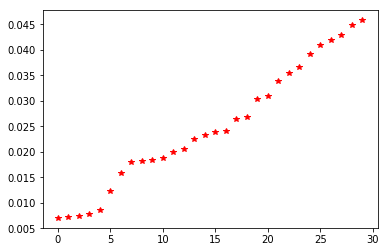

In [77]:
# Plot this a little bit nicer to visualise it better
# This shows me where to make a break (15 features left)
# plt.plot(range(0,30),list_sorted_accuraciesNP,'r*')
plt.plot(range(0,30),list_2,'r*')
plt.show();

**NEW SCENARIO**

# This will be scenario C

In [108]:
print y_train.shape
print X_train.shape

(33000,)
(33000, 32)


In [101]:
# Create new X_train with only 15 features
X_train_scenarioC = np.delete(X_train, [0,1,2,4,6,7,8,12,13,14,15,16,19,20,26,28,30] , 1)
# Create new X_test with only 15 features
X_test_scenarioC = np.delete(X_test, [0,1,2,4,6,7,8,12,13,14,15,16,19,20,26,28,30] , 1)

In [102]:
print "New shape of X_train", X_train_scenarioC.shape

(33000, 15)

# Classification for scenario C

This is exactly the same feature vector X_train as above (scenario B) but with only 15 features 

In [119]:
start = time.time()
clf = RandomForestClassifier(max_depth=12, random_state=42, n_estimators=100, criterion='gini')
print 'Created Random Forest in:', float(time.time()-start), 'seconds'
start = time.time()
clf.fit(X_train_scenarioC, y_train)
print 'Fit model in:', float(time.time()-start), 'seconds'

Created Random Forest in: 0.00104117393494 seconds
Fit model in: 9.95167088509 seconds


In [115]:
# Make predictions for the unseen dataset 
predictions_scenarioC = clf.predict(X_test_scenarioC)

## Now evaluate scenario C

In [116]:
# This is my overall accuracy again 
score_train_scenarioC = clf.score(X_train_scenarioC, y_train)
score_test_scenarioC = clf.score(X_test_scenarioC, y_test)

print "Train score:", score_train_scenarioC*100
print "Test score", score_test_scenarioC*100

Train score: 92.75454545454545
Test score 87.4137000505325


In [117]:
# Now precision, recall and F1 score

f1_scenarioC = f1_score(y_test, predictions_scenarioC, average="weighted")
rec_scenarioC = recall_score(y_test, predictions_scenarioC, average="weighted")
prec_scenarioC = precision_score(y_test, predictions_scenarioC, average="weighted")

print "F1", f1_scenarioC
print "recall", rec_scenarioC
print "precision", prec_scenarioC

F1 0.9074731208172047
recall 0.874137000505325
precision 0.9581724905007679


In [124]:
from sklearn.metrics import classification_report
target_names = ['Road', 'Sidewalk', 'Curb', 'Building', 'Other pole-like', 
                'Small poles', 'Pedestrians', '2-wheelers', '4-wheelers','trees', 'Potted plants']
print(classification_report(y_test, predictions_scenarioC, target_names=target_names))

                 precision    recall  f1-score   support

           Road       1.00      0.92      0.96    646126
       Sidewalk       0.80      0.93      0.86    176841
           Curb       0.37      0.99      0.54     11971
       Building       1.00      0.85      0.92   1271960
Other pole-like       0.04      0.96      0.07       768
    Small poles       0.79      0.99      0.88      3605
    Pedestrians       0.05      0.88      0.09      4614
     2-wheelers       0.18      0.72      0.28      7960
     4-wheelers       0.73      0.76      0.74     63779
          trees       0.28      0.94      0.44     21041
  Potted plants       0.10      0.89      0.17      1794

    avg / total       0.96      0.87      0.91   2210459



In [126]:
clf_report = classification_report(y_test, predictions_scenarioC, target_names=target_names)
clf_report = clf_report.encode('ascii','ignore')
print clf_report

# Save it in new text file
file = open(FILE_PATH_ScenarioC + "/clf_report_scenarioC.txt", "w")
file.write(clf_report)
file.close()

                 precision    recall  f1-score   support

           Road       1.00      0.92      0.96    646126
       Sidewalk       0.80      0.93      0.86    176841
           Curb       0.37      0.99      0.54     11971
       Building       1.00      0.85      0.92   1271960
Other pole-like       0.04      0.96      0.07       768
    Small poles       0.79      0.99      0.88      3605
    Pedestrians       0.05      0.88      0.09      4614
     2-wheelers       0.18      0.72      0.28      7960
     4-wheelers       0.73      0.76      0.74     63779
          trees       0.28      0.94      0.44     21041
  Potted plants       0.10      0.89      0.17      1794

    avg / total       0.96      0.87      0.91   2210459



In [125]:
confusion_matrix(y_test, predictions_scenarioC)

array([[ 594795,   37729,   12270,       2,       6,      99,      52,
            737,     101,       8,     327],
       [   2221,  164219,    7463,       6,       8,     147,     266,
           1261,     100,     157,     993],
       [     16,      42,   11895,       0,       0,       1,       0,
             14,       0,       0,       3],
       [     67,    2415,     238, 1077312,   18854,     482,   81076,
          12798,   17063,   49720,   11935],
       [      0,       0,       0,       4,     736,       0,       1,
             17,       0,       9,       1],
       [      0,       2,      10,       0,       3,    3557,       2,
             25,       5,       1,       0],
       [      0,       7,      26,      19,      21,       7,    4055,
            214,     103,       8,     154],
       [     11,      15,      20,       7,       3,      17,     896,
           5699,     703,      44,     545],
       [     60,     136,     106,     226,      42,     182,    1773,
 

Normalized confusion matrix


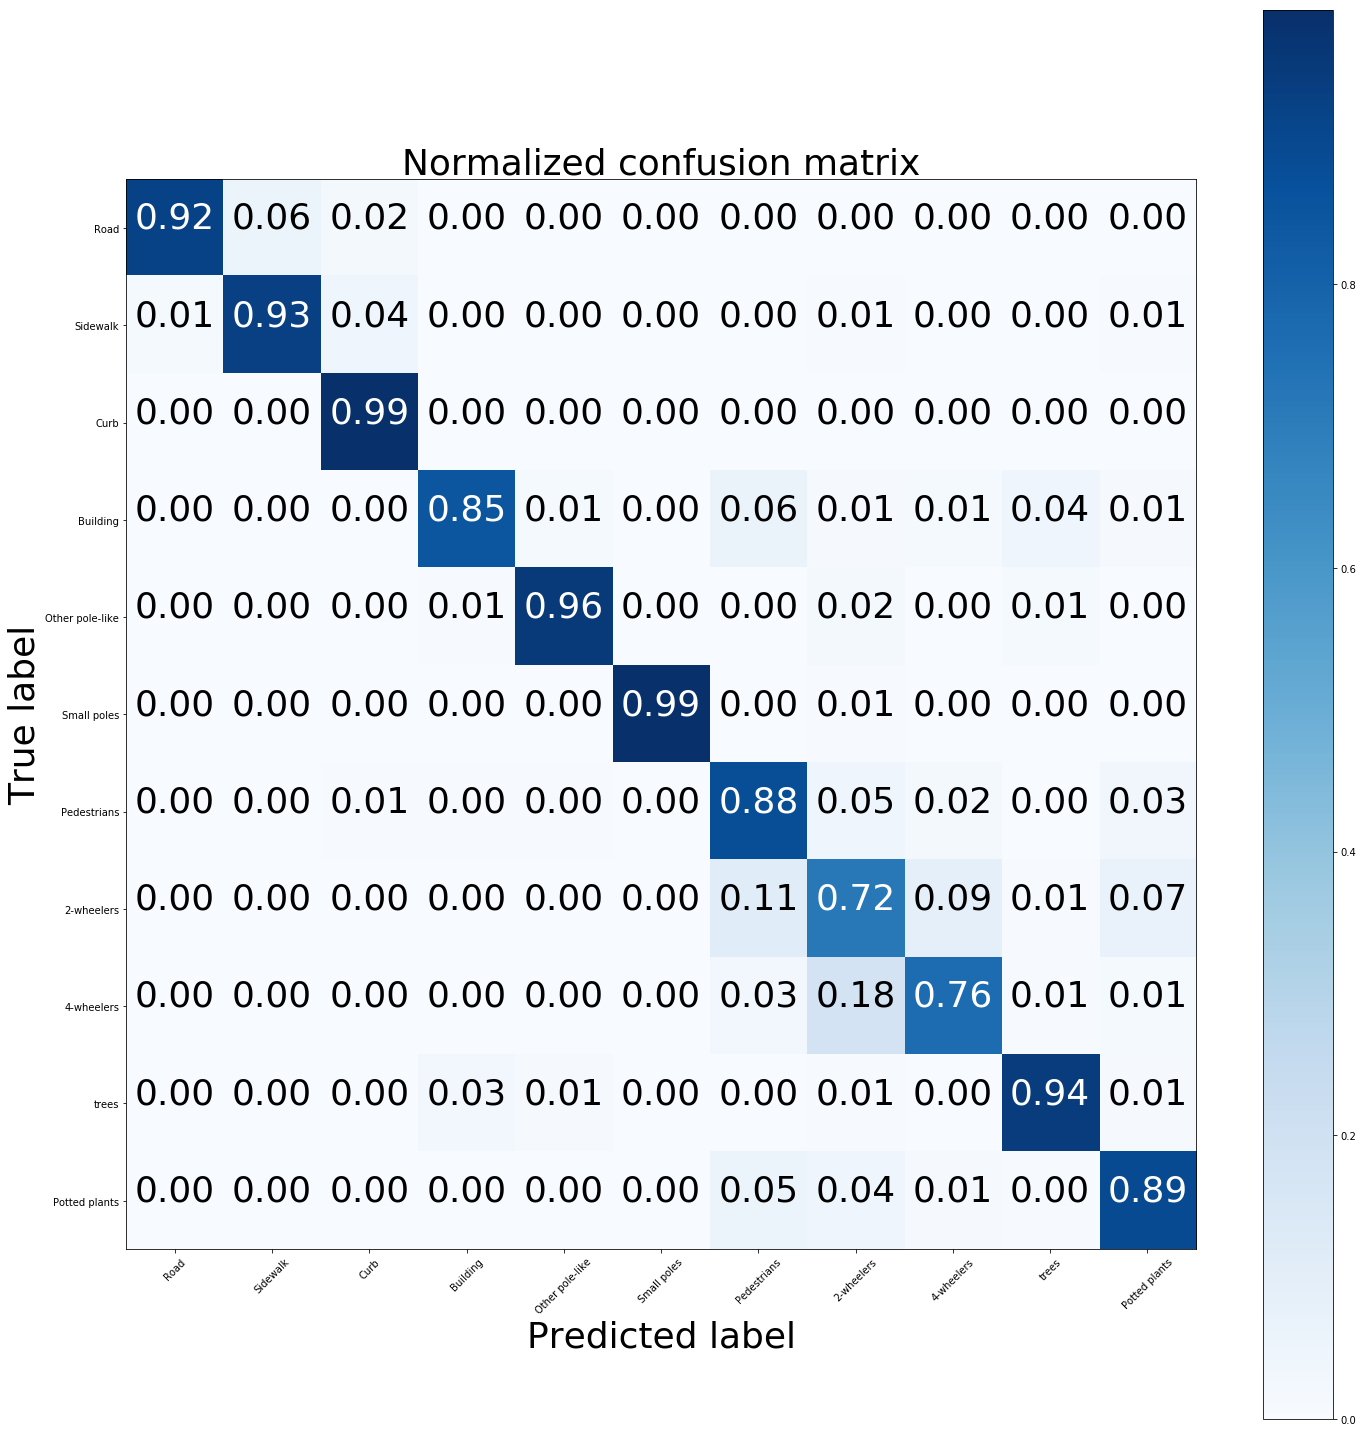

In [150]:
class_names = target_names
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    #print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontsize=36)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),fontsize=36,
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label',fontsize=36)
    plt.xlabel('Predicted label',fontsize=36)

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, predictions_scenarioC)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
#plt.figure(figsize=(20,20))
#plot_confusion_matrix(cnf_matrix, classes=class_names,
                      #title='Confusion matrix, without normalization')


# Plot normalized confusion matrix
plt.figure(figsize=(20,20))
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig(FILE_PATH_ScenarioC+"/ConfusionMatrixScenarioC")

plt.show()